<a href="https://colab.research.google.com/github/Harsh13964/Python-/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  


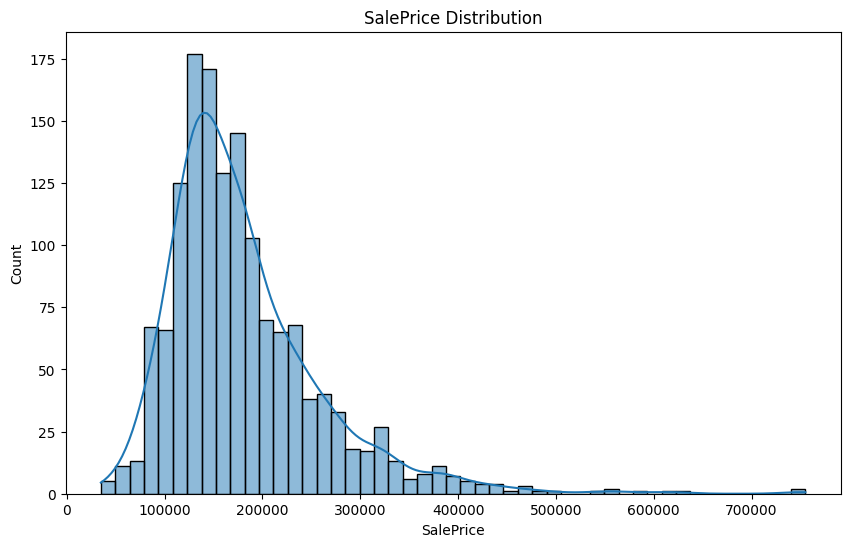

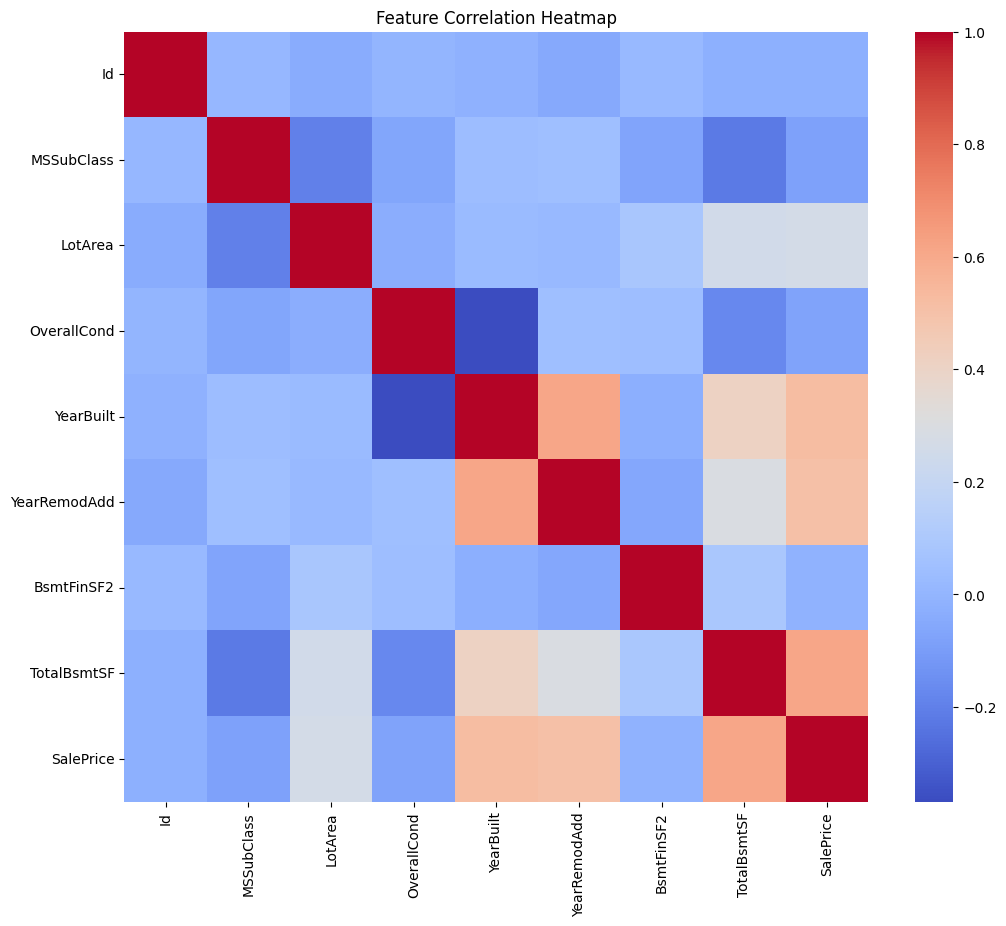

--- Linear Regression ---
MAE: 32042.04
RMSE: 49409.37
R²: 0.337

--- Ridge Regression ---
MAE: 32049.54
RMSE: 49435.27
R²: 0.336

--- Lasso Regression ---
MAE: 32042.03
RMSE: 49409.34
R²: 0.337

--- Random Forest Regressor ---
MAE: 32105.37
RMSE: 49924.59
R²: 0.323



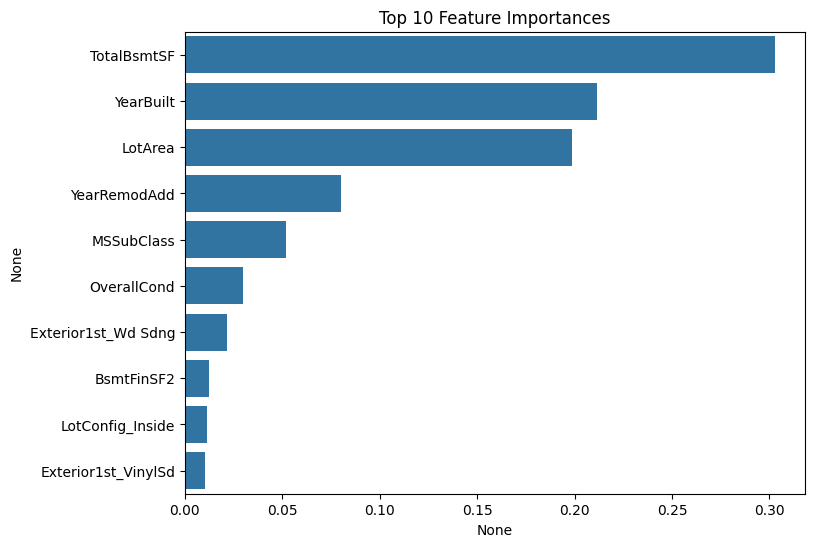

Best model saved to house_price_rf.pkl


In [2]:
# 1. 📦 Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 2. Load the dataset (update the path accordingly)
# Assuming the file is uploaded directly to the Colab environment.
# If it's in a different location, update the path below.
try:
    df = pd.read_excel('HousePricePrediction.xlsx')
except FileNotFoundError:
    print("Make sure 'HousePricePrediction.xlsx' is uploaded to your Colab environment.")
    # Exit or handle the error appropriately if the file is not found

if 'df' in locals():
    # 3. Exploratory Data Analysis (EDA)
    print(df.head())
    plt.figure(figsize=(10, 6))
    sns.histplot(df['SalePrice'], kde=True)
    plt.title('SalePrice Distribution')
    plt.show()

    plt.figure(figsize=(12, 10))
    sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', fmt=".2f")
    plt.title('Feature Correlation Heatmap')
    plt.show()

    # 4. Data Preprocessing
    df = df.drop(['Id', 'Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, errors='ignore')
    num_cols = df.select_dtypes(include=[np.number]).columns
    cat_cols = df.select_dtypes(include=['object']).columns

    df[num_cols] = df[num_cols].fillna(df[num_cols].median())
    df[cat_cols] = df[cat_cols].apply(lambda col: col.fillna(col.mode()[0]))
    df = pd.get_dummies(df, drop_first=True)

    # 5. Define features and target
    X = df.drop('SalePrice', axis=1)
    y = df['SalePrice']

    # 6. Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.2,
                                                        random_state=42)

    # 7. Model training & evaluation helper function
    def evaluate_model(model, name):
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        print(f"--- {name} ---")
        print(f"MAE: {mean_absolute_error(y_test, preds):.2f}")
        print(f"RMSE: {np.sqrt(mean_squared_error(y_test, preds)):.2f}")
        print(f"R²: {r2_score(y_test, preds):.3f}\n")

    # 8. Train models
    evaluate_model(LinearRegression(), "Linear Regression")
    evaluate_model(Ridge(alpha=1.0), "Ridge Regression")
    evaluate_model(Lasso(alpha=0.01), "Lasso Regression")
    evaluate_model(RandomForestRegressor(n_estimators=100, random_state=42),
                   "Random Forest Regressor")

    # 9. 🧠 Feature importance (random forest)
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)

    feat_imp = pd.Series(rf.feature_importances_, index=X.columns)
    top_feats = feat_imp.sort_values(ascending=False).head(10)
    plt.figure(figsize=(8, 6))
    sns.barplot(x=top_feats, y=top_feats.index)
    plt.title('Top 10 Feature Importances')
    plt.show()

    # 10. Save the best-performing model (example)
    import joblib
    joblib.dump(rf, 'house_price_rf.pkl')
    print("Best model saved to house_price_rf.pkl")